# Data Exploration
## Basic Visualisation
## Calculate Correlation

In [1]:
import pandas as pd
from sklearn import neighbors, datasets

In [2]:
df = pd.read_csv('mm_master_demos.csv')
del df['Unnamed: 0']
del df['file']
del df['date']
del df['seconds']
del df['att_team']
del df['vic_team']
del df['att_id']
del df['vic_id']
del df['award']
del df['is_bomb_planted']
del df['bomb_site']
df

,map,round,tick,att_side,vic_side,hp_dmg,arm_dmg,hitbox,wp,wp_type,...,att_rank,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
0,de_dust2,1,8482,CounterTerrorist,Terrorist,100,0,Head,USP,Pistol,...,17,17,1473.84700,1351.35800,662.17000,772.74800,PISTOL_ROUND,2950,3850,16.0
1,de_dust2,1,8600,CounterTerrorist,Terrorist,25,0,RightLeg,USP,Pistol,...,16,17,-1211.72300,1060.81300,-1184.00600,1153.34300,PISTOL_ROUND,2950,3850,16.0
2,de_dust2,1,8610,Terrorist,CounterTerrorist,20,0,LeftLeg,Glock,Pistol,...,17,16,-1153.58400,1163.13100,-1198.01500,1050.42300,PISTOL_ROUND,2950,3850,16.0
3,de_dust2,1,8624,CounterTerrorist,Terrorist,17,8,Chest,USP,Pistol,...,16,17,-1173.05300,1044.36500,-1141.78500,1190.08900,PISTOL_ROUND,2950,3850,16.0
4,de_dust2,1,8632,Terrorist,CounterTerrorist,12,7,Chest,Glock,Pistol,...,17,16,-1142.52200,1200.96700,-1157.69000,1050.70200,PISTOL_ROUND,2950,3850,16.0
5,de_dust2,1,8676,Terrorist,CounterTerrorist,12,7,Chest,Glock,Pistol,...,17,16,-1186.30500,1211.95500,-1082.75600,1107.76900,PISTOL_ROUND,2950,3850,16.0
6,de_dust2,1,8686,Terrorist,CounterTerrorist,12,7,Chest,Glock,Pistol,...,17,16,-1169.73600,1223.63900,-1071.76300,1121.34600,PISTOL_ROUND,2950,3850,16.0
7,de_dust2,1,8696,Terrorist,CounterTerrorist,15,8,Stomach,Glock,Pistol,...,17,16,-1172.03300,1220.77900,-1062.39800,1135.77300,PISTOL_ROUND,2950,3850,16.0
8,de_dust2,1,8876,CounterTerrorist,Terrorist,19,9,Stomach,USP,Pistol,...,16,17,-1970.94500,1303.59900,-1316.84800,1144.33000,PISTOL_ROUND,2950,3850,16.0
9,de_dust2,1,8886,CounterTerrorist,Terrorist,15,7,Chest,USP,Pistol,...,16,17,-1952.19800,1271.12700,-1335.28600,1140.37100,PISTOL_ROUND,2950,3850,16.0


In [3]:
df.groupby('map')['att_rank'].mean().plot(kind='bar')

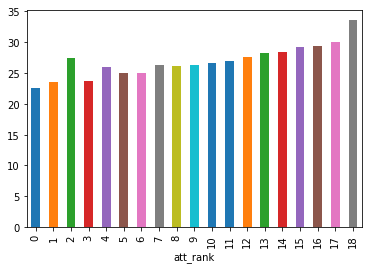

In [4]:
df.groupby('att_rank')['hp_dmg'].mean().plot(kind='bar')

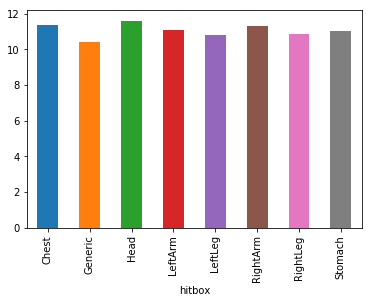

In [5]:
df.groupby('hitbox')['att_rank'].mean().plot(kind='bar')

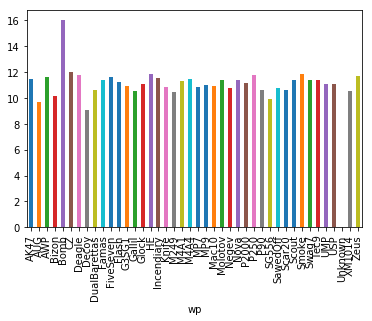

In [6]:
df.groupby('wp')['att_rank'].mean().plot(kind='bar')

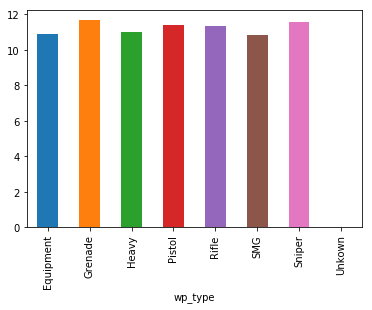

In [7]:
df.groupby('wp_type')['att_rank'].mean().plot(kind='bar')

In [8]:
df.map = df.map.astype("category").cat.codes
df.round_type = df.round_type.astype("category").cat.codes
df.hitbox = df.hitbox.astype("category").cat.codes
df.wp = df.wp.astype("category").cat.codes
df.wp_type = df.wp_type.astype("category").cat.codes
df.round_type = df.round_type.astype("category").cat.codes
df.vic_side = df.vic_side.astype("category").cat.codes
df.att_side = df.att_side.astype("category").cat.codes
df.winner_team = df.winner_team.astype("category").cat.codes
df.winner_side = df.winner_side.astype("category").cat.codes

In [9]:
df['att_rank'].corr(df['vic_rank'])

0.64500462053719787

In [10]:
df.corr()['att_rank']

map              -0.059186
round             0.012081
tick              0.006935
att_side         -0.006119
vic_side         -0.005141
hp_dmg            0.057941
arm_dmg          -0.035189
hitbox           -0.033772
wp               -0.115650
wp_type          -0.133781
winner_team       0.012413
winner_side      -0.023435
att_rank          1.000000
vic_rank          0.645005
att_pos_x         0.027995
att_pos_y         0.043982
vic_pos_x         0.026662
vic_pos_y         0.044857
round_type       -0.043192
ct_eq_val         0.020356
t_eq_val          0.010572
avg_match_rank    0.786182
Name: att_rank, dtype: float64

# Data Preparation
## Filer
- Missing Values
- Convert Text values to numbers

In [11]:
Y = df['att_rank']
X = df.copy()
del X['att_rank']

knn=neighbors.KNeighborsClassifier()
knn.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [16]:

knn.predict(X.iloc[0])

ValueError: Expected 2D array, got 1D array instead:
array=[  1.20000000e+01   1.00000000e+00   8.48200000e+03   0.00000000e+00
   1.00000000e+00   1.00000000e+02   0.00000000e+00   2.00000000e+00
   3.80000000e+01   3.00000000e+00   1.60000000e+01   0.00000000e+00
   1.70000000e+01   1.47384700e+03   1.35135800e+03   6.62170000e+02
   7.72748000e+02   3.00000000e+00   2.95000000e+03   3.85000000e+03
   1.60000000e+01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.